In [3]:
# Import packages
%load_ext autoreload
import sys
sys.path.append('../')

import matplotlib
matplotlib.rc_file('../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.colors as colors
%matplotlib inline

import numpy as np
from tqdm import tqdm_notebook as tqdm
import pickle

import darkhistory.physics as phys
from darkhistory.spec.spectrum import Spectrum
from darkhistory.spec.spectra import Spectra
from H2 import *
from plotting_utils import plot_distortion

data_dir = '/Users/viviesque/OneDrive - Massachusetts Institute of Technology/DarkHistory/DarkHistory/H2_cooling/data/'
output_dir = '/Users/viviesque/Dropbox (MIT)/DM and first BHs/Output/'
fig_dir = '/Users/viviesque/Dropbox (MIT)/DM and first BHs/Figures/'

# Load data for fiducial models

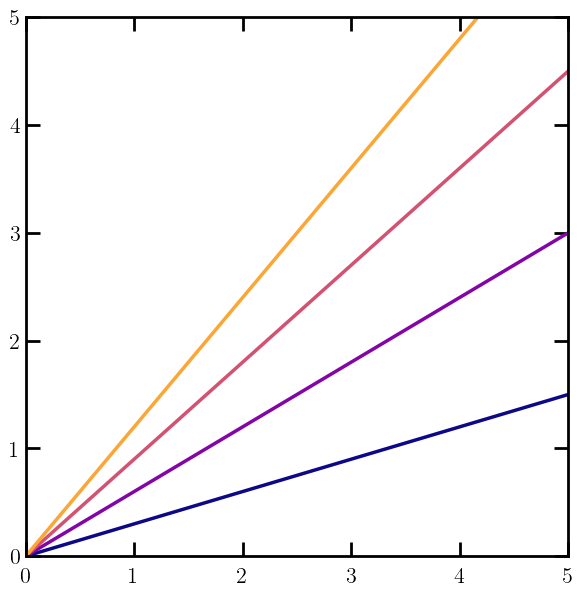

In [4]:
# Uniform color and label scheme for plots
cfast = cm.plasma(0.6)
cslow = cm.plasma(0)

cmap = cm.plasma(np.linspace(0.,0.8,4))

label_dict = {
    'LCDM' : r'$\Lambda$CDM',
    'fast' : r"Model $\bullet$",
    'slow' : r"Model $\star$"
}
color_dict = {
    'LCDM' : 'k',
    'fast' : cfast,
    'slow' : cslow
}

plt.figure(figsize=(7,7,))
for ii, col in enumerate(cmap):
    plt.plot(range(10), (ii+1)*0.3*np.arange(10), color=col)
plt.axis([0,5,0,5])
plt.show()

In [5]:
%autoreload
DH_data = {}
specs_list = {}
data_list = {}

# LCDM data
DH_data['LCDM'] = pickle.load(open(data_dir+'phot_decay_log10mDM_8.0000_log10param_40.0000_no_DM_nmax_200_reprocessed_ind_0.p', 'rb'))
specs_list['LCDM'] = repack_distortions(DH_data['LCDM'])
data_list['LCDM'] = None

# Model with smaller lifetime/more energy injection. Collapse dominated by heating.
DH_data['fast'] = pickle.load(open(data_dir+"elec_decay_log10mDM_8.2667_log10param_25.5556_nmax100_no_reion_ind_34.p", 'rb'))
specs_list['fast'] = repack_distortions(DH_data['fast'])
data_list['fast'] = repack_DH_data(DH_data['fast'])

# Model with larger lifetime/less energy injection. Collapse dominated by ionization.
DH_data['slow'] = pickle.load(open(data_dir+"elec_decay_log10mDM_8.2667_log10param_26.4444_nmax100_no_reion_ind_35.p", 'rb'))
specs_list['slow'] = repack_distortions(DH_data['slow'])
data_list['slow'] = repack_DH_data(DH_data['slow'])

  0%|          | 0/414 [00:00<?, ?it/s]

/Users/viviesque/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/DarkHistory/DarkHistory/H2_cooling/../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


  0%|          | 0/414 [00:00<?, ?it/s]

  0%|          | 0/414 [00:00<?, ?it/s]

In [6]:
# Redshift list, since it's usually the same for all data files
rs_list = DH_data['LCDM']['data'][-1]['rs']
dlnz = np.log(rs_list[0])-np.log(rs_list[1])

In [7]:
# # Halo evolution
# start_rs = 2000.
# end_rs = 4.

# rs_vir = 20
# Tvir = 1.6e3 * phys.kB
# M_halo = M_given_T(rs_vir, Tvir)#phys.TCMB(rs_vir))

# init_log_H2 = [np.log(1e-10)]
# mu = 0.6

# print(f"Using rs_vir = {rs_vir},") 
# print(f"M_halo = {M_halo} solar masses,")
# print(f"T_vir = {T_vir(rs_vir, M_halo)/phys.kB:.0f} K.")

# halo_data = {}
# rs_vir_actual = {}

# for opt in DH_data.opts():
#     print(opt)
#     if key=='LCDM':
#         DM_switch = False
#     else:
#         DM_switch = True

#     halo_data[key], rs_vir_actual[key] = halo_integrate(
#         rs_vir, M_halo, init_log_H2, start_rs=start_rs, end_rs=end_rs,
#         dists=specs_list[opt], DM_switch=DM_switch, DM_args=data_list[key]
#     )    
#     if key != 'LCDM':
#         halo_data[key+' LW'], rs_vir_actual[key+' LW'] = halo_integrate(
#             rs_vir, M_halo, init_log_H2, start_rs=start_rs, end_rs=end_rs,
#             dists=specs_list[key], DM_switch=DM_switch, DM_args=data_list[key],
#             LW=True
#         )
#     print("Halo collapses?", collapse_criterion(halo_data[key]['t'], halo_data[key]['y'][2], rs_vir_actual[key]))
#     print('~~~')

In [13]:
%autoreload

inj_options = ['no inj', 'rad only', 'heat only', 'ion only', 'full']

start_rs = 2000.
end_rs = 4.

rs_vir = 17
Tvir = 1.6e3 * phys.kB
M_halo = M_given_T(rs_vir, Tvir)#phys.TCMB(rs_vir))
init_H2 = [np.log(1e-10)]

print(f"Using rs_vir = {rs_vir},") 
print(f"M_halo = {M_halo} solar masses,")
print(f"T_vir = {T_vir(rs_vir, M_halo)/phys.kB:.0f} K.")


halo_data = {}
rs_vir_actual = {}

for key in DH_data.keys():
    halo_data[key] = {}
    rs_vir_actual[key] = {}

    if key == 'LCDM':
        inj_list = ['rad only']
    else:
        inj_list = inj_options

    for opt in inj_list:
        print(opt)

        # Default no injection
        dists=0
        DM_switch=False
        datum=None
        ion_switch=True
        heat_switch=True

        # if opt=='no cascade':
        #     dists=specs_list[key]
        if opt=='rad only':
            dists=specs_list[key]
        elif opt=='heat only':
            DM_switch=True
            datum = data_list[key]
            ion_switch=False
            print(datum)
        elif opt=='ion only':
            DM_switch=True
            datum = data_list[key]
            heat_switch=False
        elif opt=='full':
            dists=specs_list[key]
            DM_switch=True
            datum = data_list[key]

        halo_data[key][opt], rs_vir_actual[key][opt] = halo_integrate(
            rs_vir, M_halo, init_H2, start_rs=start_rs, end_rs=end_rs,
            dists=dists, DM_switch=DM_switch, DM_args=datum,
            ion_switch=ion_switch, heat_switch=heat_switch
        )
        # print(halo_data[mDM][key]['y'][1])

halo_data['LCDM']['full'] = halo_data['LCDM']['rad only']
rs_vir_actual['LCDM']['full'] = rs_vir_actual['LCDM']['rad only']

Using rs_vir = 17,
M_halo = 1830879.9231527909 solar masses,
T_vir = 1600 K.
rad only
Required step size is less than spacing between numbers.
no inj
Required step size is less than spacing between numbers.
rad only
Required step size is less than spacing between numbers.
heat only
(184784979.7422287, 3.5938136638046406e+25, 'decay', 'elec', {'H ion': <scipy.interpolate._interpolate.interp1d object at 0x110eac320>, 'He ion': <scipy.interpolate._interpolate.interp1d object at 0x110eac1e0>, 'Lya': <scipy.interpolate._interpolate.interp1d object at 0x110e937a0>, 'heat': <scipy.interpolate._interpolate.interp1d object at 0x110e93610>, 'cont': <scipy.interpolate._interpolate.interp1d object at 0x110e93de0>, 'err': <scipy.interpolate._interpolate.interp1d object at 0x110eb71b0>, 'eff_exc': <scipy.interpolate._interpolate.interp1d object at 0x110eb7430>})
Required step size is less than spacing between numbers.
ion only
Required step size is less than spacing between numbers.
full
Required st

# Examples of halo evolution, with and without energy injection

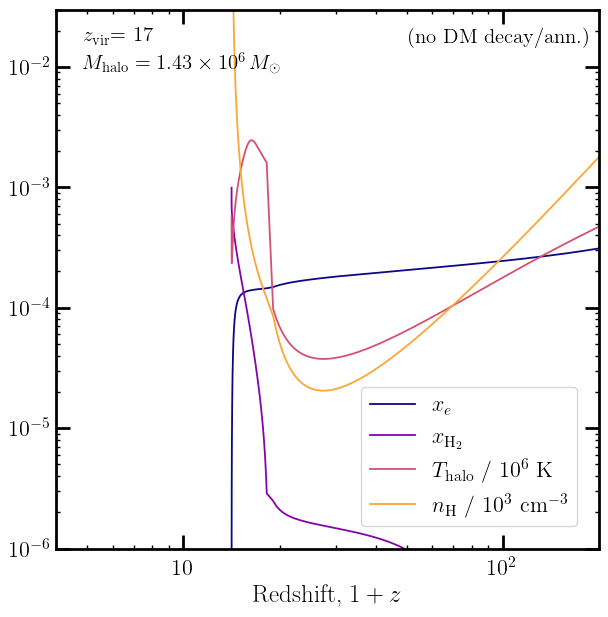

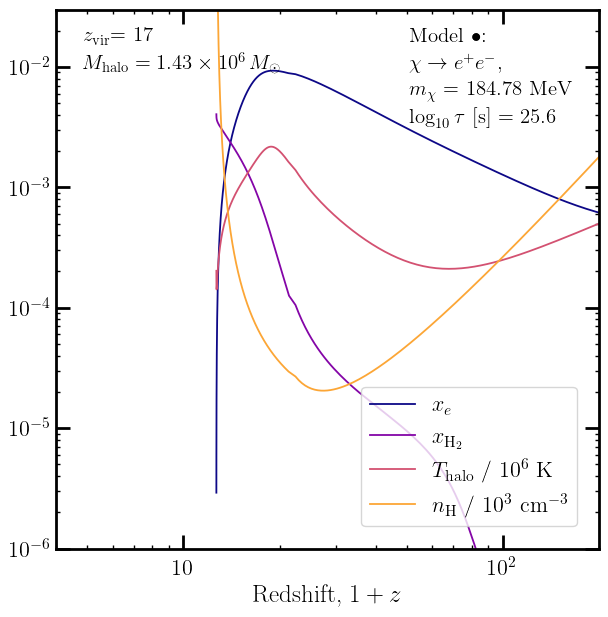

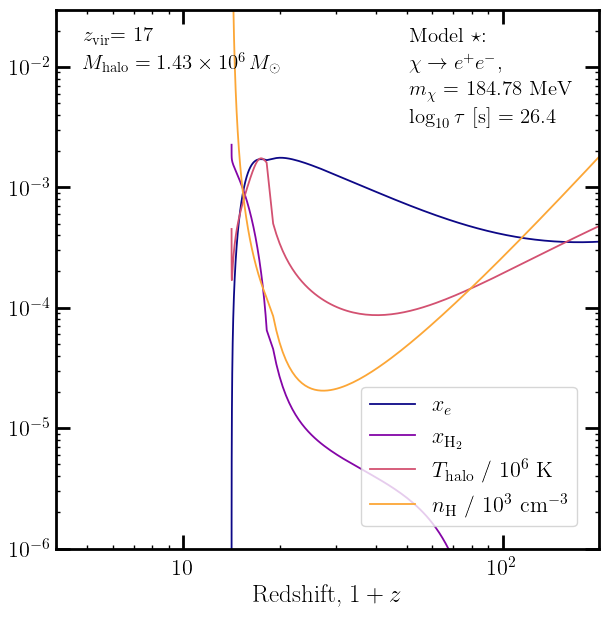

In [17]:
%autoreload
for key in DH_data.keys():
    # Get rid of discontinuity
    discont_mask = np.roll(halo_data[key]['full']['t'] != rs_vir_actual[key]['full'], -1)
    # discont_mask_fs = np.roll(halo_data[key+' fhalo']['t'] != rs_vir_actual[key+' fhalo'], -1)

    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.loglog()

    plt.plot(halo_data[key]['full']['t'][discont_mask], halo_data[key]['full']['y'][0][discont_mask], 
             linewidth=1.3,color=cmap[0], label=r'$x_e$')
    plt.plot(halo_data[key]['full']['t'][discont_mask], halo_data[key]['full']['y'][1][discont_mask], 
             linewidth=1.3,color=cmap[1], label=r'$x_{\mathrm{H}_2}$')
    plt.plot(halo_data[key]['full']['t'][discont_mask], halo_data[key]['full']['y'][2][discont_mask] / phys.kB / 1e6, 
             linewidth=1.3,color=cmap[2], label=r'$T_\mathrm{halo}$ / 10$^6$ K')
    plt.plot(halo_data[key]['full']['t'][discont_mask], halo_data[key]['full']['y'][3][discont_mask] / 1e3, 
             linewidth=1.3,color=cmap[3], label=r'$n_\mathrm{H}$ / 10$^3$ cm$^{-3}$')
    
    # if key != 'LCDM':
    #     discont_mask_LW = np.roll(halo_data[key+' LW']['t'] != rs_vir_actual[key+' LW'], -1)
    #     plt.plot(halo_data[key+' LW']['t'][discont_mask_LW], halo_data[key+' LW']['y'][0][discont_mask_LW], 
    #             linewidth=1.3,color=cmap[0], linestyle=':')
    #     plt.plot(halo_data[key+' LW']['t'][discont_mask_LW], halo_data[key+' LW']['y'][1][discont_mask_LW], 
    #             linewidth=1.3,color=cmap[1], linestyle=':')
    #     plt.plot(halo_data[key+' LW']['t'][discont_mask_LW], halo_data[key+' LW']['y'][2][discont_mask_LW] / phys.kB / 1e6, 
    #             linewidth=1.3,color=cmap[2], linestyle=':')
    #     plt.plot(halo_data[key+' LW']['t'][discont_mask_LW], halo_data[key+' LW']['y'][3][discont_mask_LW] / 1e3, 
    #             linewidth=1.3,color=cmap[3], linestyle=':')

    # plt.plot(rs_list, phys.Tm_std(rs_list) / phys.kB / 1e6, label=r'$T_\mathrm{IGM}$ / 10$^6$ K',
    #         linewidth=1, linestyle='--', color='r')
    # plt.plot(rs_list, phys.nH * rs_list**3 / 1e3, label=r'IGM density / 10$^3$ cm$^{-3}$',
    #         linewidth=1, linestyle='--', color='grey')
    plt.axis([4, 200, 1e-6, 3e-2])


    # # Make a second legend if including LW
    # nLW, = plt.plot([0,0], color='k', linewidth=1.3)
    # wLW, = plt.plot([0,0], color='k', linewidth=1.3, linestyle=':')
    # lLW = plt.legend([nLW, wLW], ["total self-shielding", "no self-shielding"], loc='lower left')

    plt.legend(loc='lower right')
    # ax.add_artist(lLW)
    plt.xlabel(r'Redshift, $1+z$')
    plt.text(0.05, 0.94, r"$z_\mathrm{vir}$"+f"= {rs_vir:.0f}", fontsize=15, transform = ax.transAxes)
    plt.text(0.05, 0.89, r"$M_\mathrm{halo} = 1.43 \times 10^6 \, M_\odot$", fontsize=15, transform = ax.transAxes)
    if key != 'LCDM':
        if key == 'fast':
            plt.text(0.65, 0.94, r"Model $\bullet$:", fontsize=15, transform = ax.transAxes)
        else:
            plt.text(0.65, 0.94, r"Model $\star$:", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.89, fr"$\chi \rightarrow e^+ e^-$,", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.84, fr"$m_\chi$ = {DH_data[key]['DM_params']['mDM']/1e6:.2f} MeV", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.79, r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data[key]['DM_params']['inj_param']):.1f}", fontsize=15, transform = ax.transAxes)
    else:
        plt.text(0.65, 0.94, fr"(no DM decay/ann.)", fontsize=15, transform = ax.transAxes)

    # plt.savefig(fig_dir+f'LW_halo_evol_zvir{rs_vir:.0f}_M{M_halo:.2E}_{key}.pdf')
    plt.show()

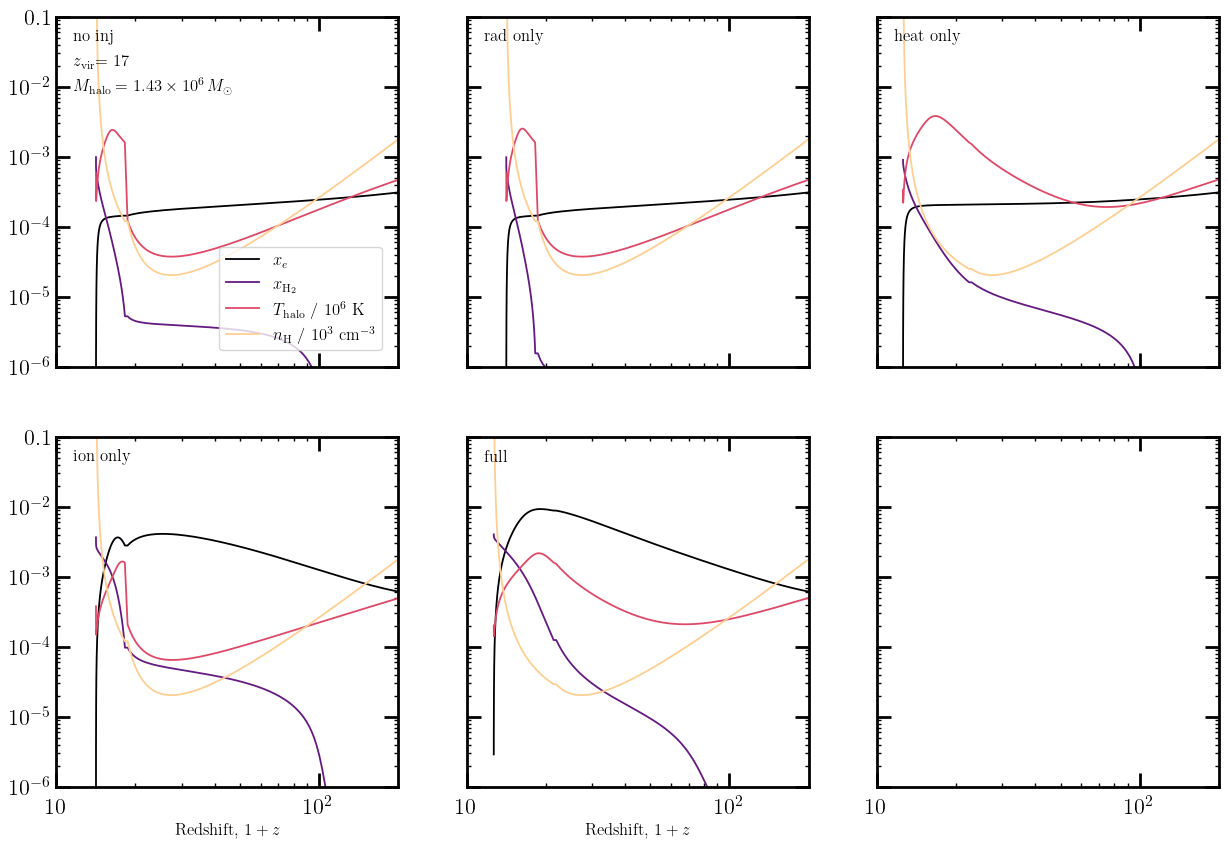

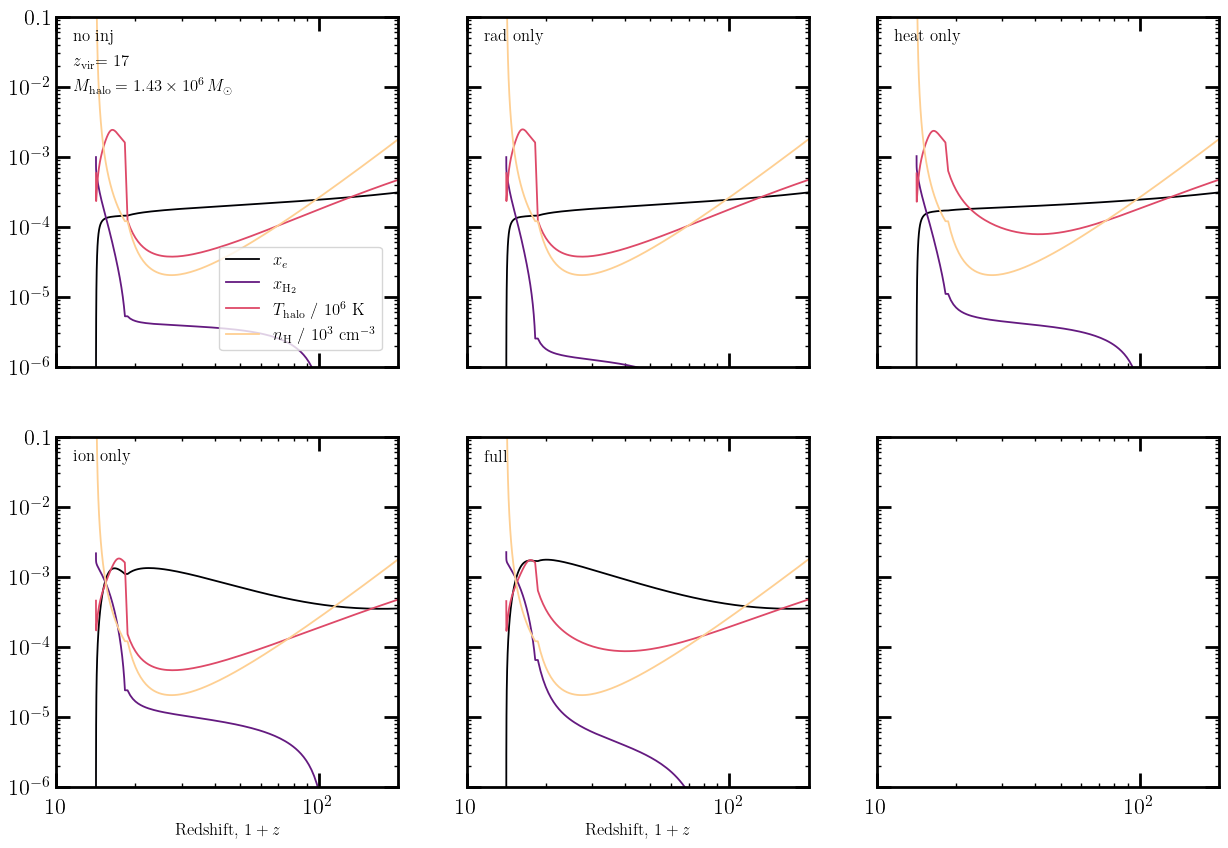

In [22]:
%autoreload
# Isolate the different injection effects

cmap = cm.magma(np.linspace(0,0.9,4))

for key in ['fast','slow']: #DH_data.keys():
    # Make a new figure
    fig, ax = plt.subplots(2, 3, figsize=(15,10), sharex=True, sharey=True)
    ax = ax.flatten()

    for ii, opt in enumerate(inj_options):
        # Get rid of discontinuity
        discont_mask = np.ones_like(halo_data[key][opt]['t'], dtype='bool') 
        
        ax[ii].loglog()
        ax[ii].plot(halo_data[key][opt]['t'][discont_mask], halo_data[key][opt]['y'][0][discont_mask], 
                    linewidth=1.3,color=cmap[0], label=r'$x_e$')
        ax[ii].plot(halo_data[key][opt]['t'][discont_mask], halo_data[key][opt]['y'][1][discont_mask], 
                    linewidth=1.3,color=cmap[1], label=r'$x_{\mathrm{H}_2}$')
        ax[ii].plot(halo_data[key][opt]['t'][discont_mask], halo_data[key][opt]['y'][2][discont_mask] / phys.kB / 1e6, 
                    linewidth=1.3,color=cmap[2], label=r'$T_\mathrm{halo}$ / 10$^6$ K')
        ax[ii].plot(halo_data[key][opt]['t'][discont_mask], halo_data[key][opt]['y'][3][discont_mask] / 1e3, 
                    linewidth=1.3,color=cmap[3], label=r'$n_\mathrm{H}$ / 10$^3$ cm$^{-3}$')

        ax[ii].axis([10, 200, 1e-6, 1e-1])

        if ii==0:
            ax[ii].legend(loc='lower right', fontsize=12)
            ax[ii].text(0.05, 0.86, r"$z_\mathrm{vir}$"+f"= {rs_vir:.0f}", fontsize=12, transform = ax[ii].transAxes)
            ax[ii].text(0.05, 0.79, r"$M_\mathrm{halo} = 1.43 \times 10^6 \, M_\odot$", fontsize=12, transform = ax[ii].transAxes)
        if ii>2:
            ax[ii].set_xlabel(r'Redshift, $1+z$', fontsize=12)
        ax[ii].text(0.05, 0.93, opt, fontsize=12, transform = ax[ii].transAxes)

    # plt.savefig(fig_dir+f'halo_effects_comparison_mDM_{mDM:.0f}eV_Tvir_{T_vir(rs_vir, M_halo)/phys.kB:.2E}K.pdf')
    plt.show()

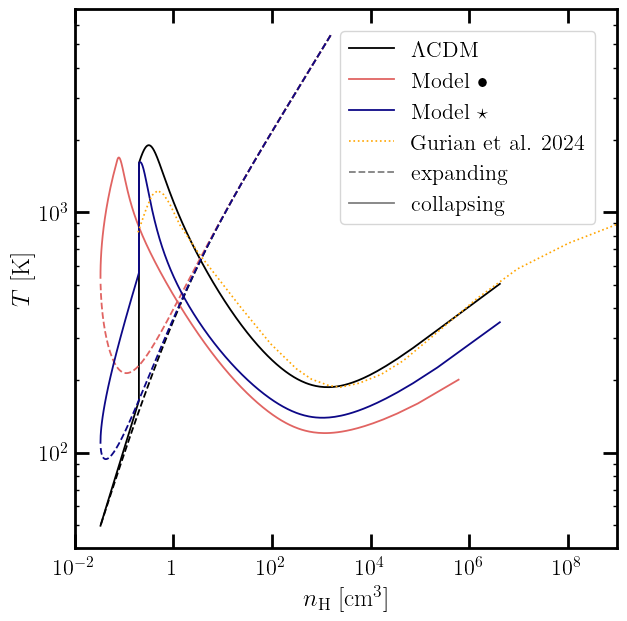

In [15]:
# Temperature-density relationship compared to simulations/analytic results
Gurian_fig1 = np.array([
    [0.19200176793036725, 824.9924976324792],
    [0.2809096188343848, 1031.5242572239092],
    [0.3686467888838656, 1175.8822432395825],
    [0.48378711814246567, 1231.5694901712286],
    [0.6348895005683186, 1185.1265106842777],
    [0.8331860498468026, 1088.9391579542976],
    [1.3590045495438539, 884.613109855885],
    [3.2431065262241185, 675.7510886790784],
    [22.954978859321542, 403.5613109582194],
    [94.3419590671777, 283.27614825570913],
    [311.959207045009, 223.17994048785377],
    [632.4290409432389, 201.95295663953402],
    [1429.3656429973596, 189.92361232235444],
    [2461.676777274177, 187.04512693392786],
    [5874.5057362110165, 194.42810576928412],
    [16502.05167199444, 211.66814387464603],
    [46355.8504516527, 241.33418690781673],
    [170889.3541498248, 301.8173297897219],
    [1423826.2594496352, 437.0179214170039],
    [9544735.816778373, 581.3564084849605],
    [104363767.12515171, 744.24175613256],
    [969413972.0638154, 888.9316042783801],
    [1965274737.1576757, 909.861127798159],
    [3573713479.0047784, 896.0828944410088],
    [8528252175.83392, 862.4144367917993]
])

plt.figure(figsize=(7,7))
plt.loglog()

for key in DH_data.keys():
    T = halo_data[key]['y'][2] / phys.kB
    nH = halo_data[key]['y'][3]
    ind_min = np.argmin(nH)

    plt.plot(nH[:ind_min], T[:ind_min], color=color_dict[key], linewidth=1.3, linestyle='--')
    plt.plot(nH[ind_min:], T[ind_min:], color=color_dict[key], linewidth=1.3, label=label_dict[key])

plt.plot(Gurian_fig1[:,0] ,Gurian_fig1[:,1] , color='orange', linewidth=1.2, linestyle=':', label='Gurian et al. 2024')
# plt.plot(Gurian_fig1[:,0], 10*Gurian_fig1[:,0]**(1/3), color='gray', linewidth=1, linestyle=':')

# Dummy lines for legend
plt.plot([-1,0], [-1,0], color='gray', linewidth=1.3, linestyle='--', label="expanding")
plt.plot([-1,0], [-1,0], color='gray', linewidth=1.3, label='collapsing')

plt.axis([1e-2, 1e9, 4e1, 7e3])
plt.xlabel(r'$n_H$ [cm$^-3$]')
plt.ylabel(r"$T$ [K]")
plt.legend()
plt.show()

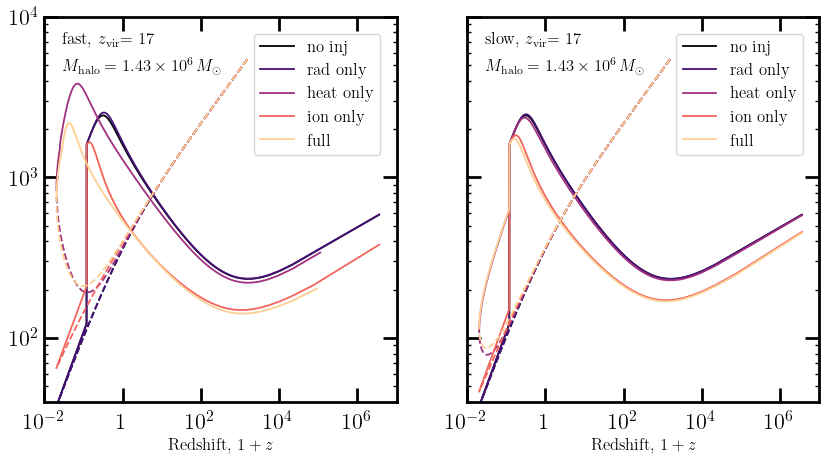

In [32]:
%autoreload
# Isolate the different injection effects on temperature-density relationship
cmap = cm.magma(np.linspace(0,0.9,5))
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

for ii, key in enumerate(['fast','slow']): #DH_data.keys():
    ax[ii].loglog()

    for jj, opt in enumerate(inj_options):
        T = halo_data[key][opt]['y'][2] / phys.kB
        nH = halo_data[key][opt]['y'][3]
        ind_min = np.argmin(nH)

        ax[ii].plot(nH[:ind_min], T[:ind_min], color=cmap[jj], linewidth=1.3, linestyle='--')
        ax[ii].plot(nH[ind_min:], T[ind_min:], color=cmap[jj], linewidth=1.3, label=opt)

    ax[ii].axis([1e-2, 1e7, 4e1, 1e4])

    ax[ii].legend(loc='upper right', fontsize=12)
    ax[ii].set_xlabel(r'Redshift, $1+z$', fontsize=12)
    ax[ii].text(0.05, 0.93, key+r", $z_\mathrm{vir}$"+f"= {rs_vir:.0f}", fontsize=12, transform = ax[ii].transAxes)
    ax[ii].text(0.05, 0.86, r"$M_\mathrm{halo} = 1.43 \times 10^6 \, M_\odot$", fontsize=12, transform = ax[ii].transAxes)

    # plt.savefig(fig_dir+f'halo_effects_comparison_mDM_{mDM:.0f}eV_Tvir_{T_vir(rs_vir, M_halo)/phys.kB:.2E}K.pdf')
plt.show()

# Timescales for evolution

/Users/viviesque/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/DarkHistory/DarkHistory/H2_cooling/H2.py:475: RuntimeWarning: divide by zero encountered in divide
  return - T / dTm_dt_DM(rs, xe, n, DM_args, DM_switch, f_suppress)


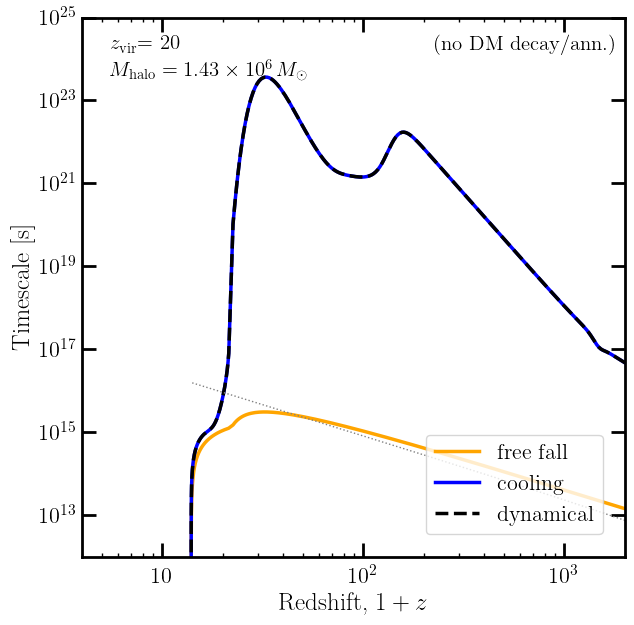

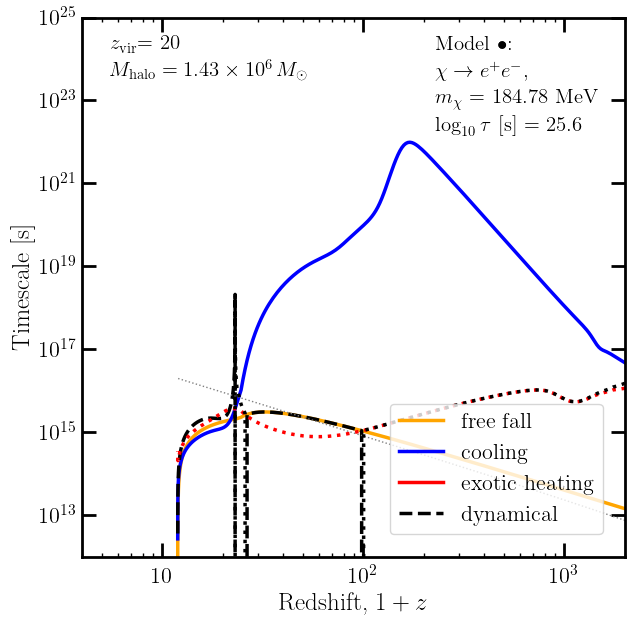

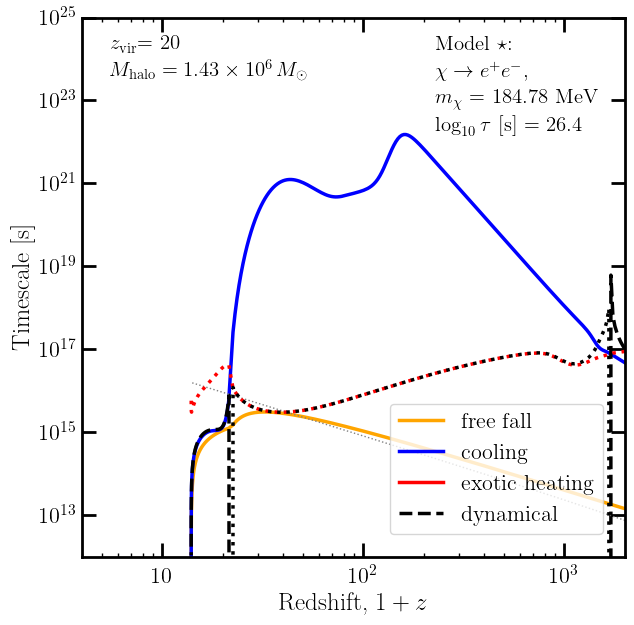

In [17]:
# as a function of redshift
for key in DH_data.keys():
    if key=='LCDM':
        DM_switch = False
    else:
        DM_switch = True

    # Get rid of discontinuity
    discont_mask = np.roll(halo_data[key]['t'] != rs_vir_actual[key], -1)
    # discont_mask_fs = np.roll(halo_data[key+' fhalo']['t'] != rs_vir_actual[key+' fhalo'], -1)

    rs = halo_data[key]['t'][discont_mask]
    xe = halo_data[key]['y'][0][discont_mask]
    xH2 = halo_data[key]['y'][1][discont_mask]
    T = halo_data[key]['y'][2][discont_mask]
    n = halo_data[key]['y'][3][discont_mask]
    rho = n * (phys.rho_DM + phys.rho_baryon) / phys.nH
    
    # Calculate relevant timescales:
    test_t_ff = t_ff(rho)
    test_t_cool = t_cool(xe, xH2, T, n, rs)
    test_t_heat = t_heat(rs, xe, T, n, DM_args=data_list[key], DM_switch=DM_switch)

    test_t_dyn = t_dyn(
        rho, xe, xH2, T, n, rs,
        DM_switch=DM_switch, DM_args=data_list[key]
    )

    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.loglog()

    # Plot timescales
    plt.plot(rs, test_t_ff, color='orange', label='free fall')
    plt.plot(rs, test_t_cool, color='b', label='cooling')
    if key != 'LCDM':
        plt.plot(rs, test_t_heat, color='r', label='exotic heating')
    plt.plot(rs, test_t_dyn, color='k', linestyle='--', label='dynamical')
    plt.plot(rs, 1/phys.hubble(rs), color='gray', linestyle=':', linewidth=1)

    # Plot negative values
    plt.plot(rs, -test_t_ff, color='orange', linestyle=':')
    plt.plot(rs, -test_t_cool, color='b', linestyle=':')
    if key != 'LCDM':
        plt.plot(rs, -test_t_heat, color='r', linestyle=':')
    plt.plot(rs, -test_t_dyn, color='k', linestyle=':')

    plt.axis([4, 2000, 1e12, 1e25])
    plt.legend(loc='lower right')
    
    plt.xlabel(r'Redshift, $1+z$')
    plt.ylabel(r'Timescale [s]')
    plt.text(0.05, 0.94, r"$z_\mathrm{vir}$"+f"= {rs_vir:.0f}", fontsize=15, transform = ax.transAxes)
    plt.text(0.05, 0.89, r"$M_\mathrm{halo} = 1.43 \times 10^6 \, M_\odot$", fontsize=15, transform = ax.transAxes)
    if key != 'LCDM':
        if key == 'fast':
            plt.text(0.65, 0.94, r"Model $\bullet$:", fontsize=15, transform = ax.transAxes)
        else:
            plt.text(0.65, 0.94, r"Model $\star$:", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.89, fr"$\chi \rightarrow e^+ e^-$,", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.84, fr"$m_\chi$ = {DH_data[key]['DM_params']['mDM']/1e6:.2f} MeV", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.79, r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data[key]['DM_params']['inj_param']):.1f}", fontsize=15, transform = ax.transAxes)
    else:
        plt.text(0.65, 0.94, fr"(no DM decay/ann.)", fontsize=15, transform = ax.transAxes)

    plt.savefig(fig_dir+f'timescales_zvir{rs_vir:.0f}_M{M_halo:.2E}_{key}.pdf')
    plt.show()

/Users/viviesque/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/DarkHistory/DarkHistory/H2_cooling/H2.py:475: RuntimeWarning: divide by zero encountered in divide
  return - T / dTm_dt_DM(rs, xe, n, DM_args, DM_switch, f_suppress)


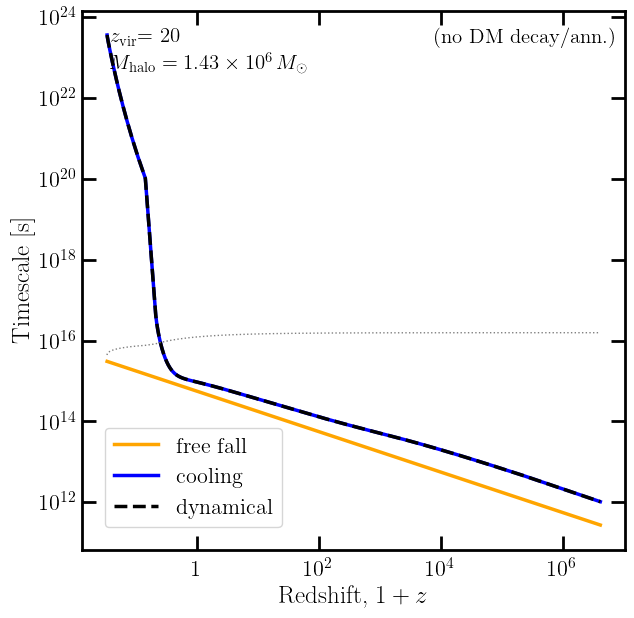

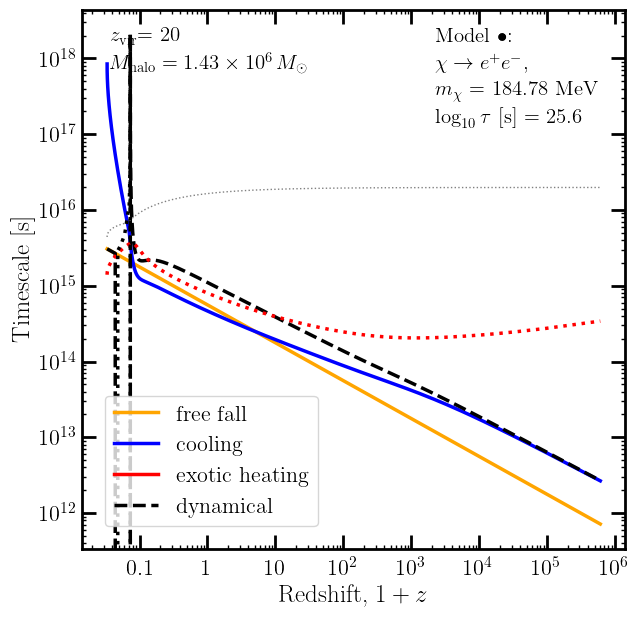

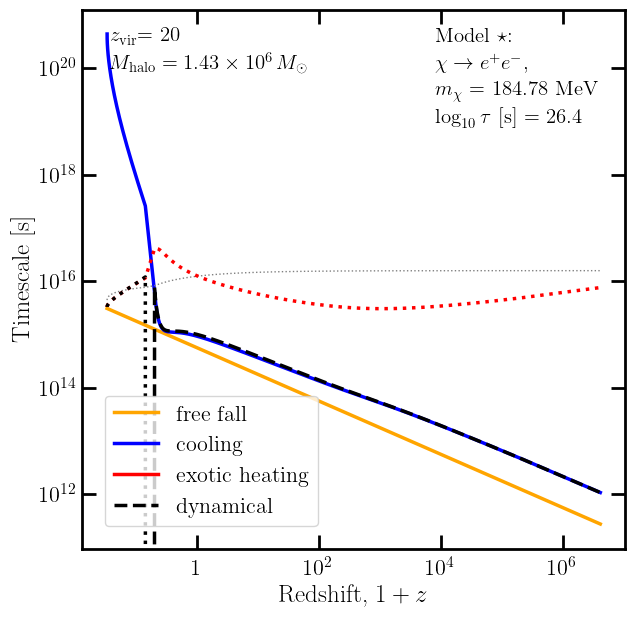

In [19]:
# as a function of density
for key in DH_data.keys():
    if key=='LCDM':
        DM_switch = False
    else:
        DM_switch = True
        
    # Get rid of discontinuity
    discont_mask = np.roll(halo_data[key]['t'] != rs_vir_actual[key], -1)
    # discont_mask_fs = np.roll(halo_data[key+' fhalo']['t'] != rs_vir_actual[key+' fhalo'], -1)

    rs = halo_data[key]['t'][discont_mask]
    xe = halo_data[key]['y'][0][discont_mask]
    xH2 = halo_data[key]['y'][1][discont_mask]
    T = halo_data[key]['y'][2][discont_mask]
    n = halo_data[key]['y'][3][discont_mask]
    rho = n * (phys.rho_DM + phys.rho_baryon) / phys.nH

    ind_min = np.argmin(nH)
    
    # Calculate relevant timescales:
    test_t_ff = t_ff(rho)
    test_t_cool = t_cool(xe, xH2, T, n, rs)
    test_t_heat = t_heat(rs, xe, T, n, DM_args=data_list[key], DM_switch=DM_switch)

    test_t_dyn = t_dyn(
        rho, xe, xH2, T, n, rs,
        DM_switch=DM_switch, DM_args=data_list[key]
    )

    plt.figure(figsize=(7,7))
    ax = plt.gca()
    plt.loglog()

    # Plot timescales
    plt.plot(n[ind_min:], test_t_ff[ind_min:], color='orange', label='free fall')
    plt.plot(n[ind_min:], test_t_cool[ind_min:], color='b', label='cooling')
    if key != 'LCDM':
        plt.plot(n[ind_min:], test_t_heat[ind_min:], color='r', label='exotic heating')
    plt.plot(n[ind_min:], test_t_dyn[ind_min:], color='k', linestyle='--', label='dynamical')
    plt.plot(n[ind_min:], 1/phys.hubble(rs[ind_min:]), color='gray', linestyle=':', linewidth=1)

    # Plot negative values
    plt.plot(n[ind_min:], -test_t_ff[ind_min:], color='orange', linestyle=':')
    plt.plot(n[ind_min:], -test_t_cool[ind_min:], color='b', linestyle=':')
    if key != 'LCDM':
        plt.plot(n[ind_min:], -test_t_heat[ind_min:], color='r', linestyle=':')
    plt.plot(n[ind_min:], -test_t_dyn[ind_min:], color='k', linestyle=':')

    # plt.axis([4, 2000, 1e12, 1e25])
    plt.legend(loc='lower left')
    
    plt.xlabel(r'$n_H$ [cm$^-3$]')
    plt.ylabel(r'Timescale [s]')
    plt.text(0.05, 0.94, r"$z_\mathrm{vir}$"+f"= {rs_vir:.0f}", fontsize=15, transform = ax.transAxes)
    plt.text(0.05, 0.89, r"$M_\mathrm{halo} = 1.43 \times 10^6 \, M_\odot$", fontsize=15, transform = ax.transAxes)
    if key != 'LCDM':
        if key == 'fast':
            plt.text(0.65, 0.94, r"Model $\bullet$:", fontsize=15, transform = ax.transAxes)
        else:
            plt.text(0.65, 0.94, r"Model $\star$:", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.89, fr"$\chi \rightarrow e^+ e^-$,", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.84, fr"$m_\chi$ = {DH_data[key]['DM_params']['mDM']/1e6:.2f} MeV", fontsize=15, transform = ax.transAxes)
        plt.text(0.65, 0.79, r"$\log_{10} \tau$ [s] = "+fr"{np.log10(DH_data[key]['DM_params']['inj_param']):.1f}", fontsize=15, transform = ax.transAxes)
    else:
        plt.text(0.65, 0.94, fr"(no DM decay/ann.)", fontsize=15, transform = ax.transAxes)

    plt.savefig(fig_dir+f'timescales_zvir{rs_vir:.0f}_M{M_halo:.2E}_{key}.pdf')
    plt.show()

# Mass scales

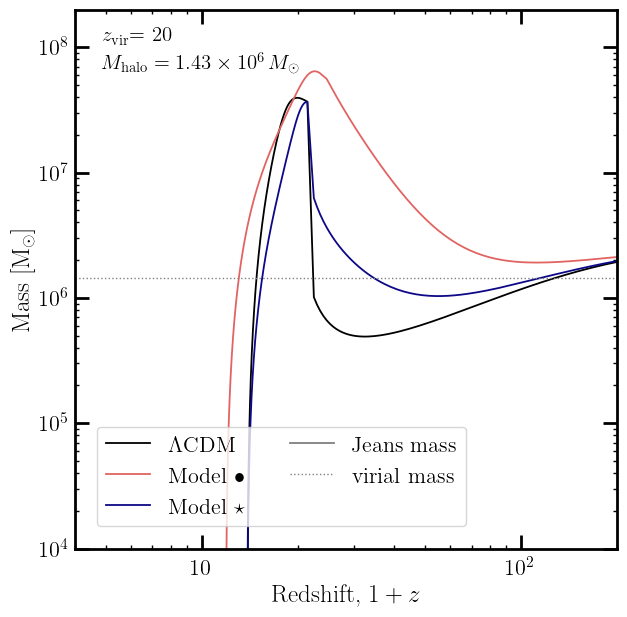

In [22]:
# Jeans and Bonnor-Ebert masses
# as a function of redshift
%autoreload
plt.figure(figsize=(7,7))
ax = plt.gca()
plt.loglog()

mu = 0.6
label_dict = {
    'LCDM' : r'$\Lambda$CDM',
    'fast' : r"Model $\bullet$",
    'slow' : r"Model $\star$"
}
color_dict = {
    'LCDM' : 'k',
    'fast' : cfast,
    'slow' : cslow
}

for key in ['LCDM', 'fast', 'slow']: #DH_data.keys():
    temp = halo_data[key]['y'][2] # eV
    rho = halo_data[key]['y'][3] * phys.mp * mu # eV / cm^3
    M_J = Jeans_mass(temp, rho)
    M_BE = BonnorEbert_mass(temp, rho)

    # Get rid of discontinuity
    discont_mask = np.roll(halo_data[key]['t'] != rs_vir_actual[key], -1)
    # discont_mask_fs = np.roll(halo_data[key+' fhalo']['t'] != rs_vir_actual[key+' fhalo'], -1)

    # Plot relevant mass scales
    plt.plot(halo_data[key]['t'][discont_mask], M_J[discont_mask], linewidth=1.3, color=color_dict[key], label=label_dict[key])
    # plt.plot(halo_data[key]['t'][discont_mask], M_BE[discont_mask], linewidth=1.3, color=color_dict[key], linestyle='--')

# Dummy lines for legend
plt.plot([0, -1], [0, -1], linewidth=1.3, color='gray', label='Jeans mass')
# plt.plot([0, -1], [0, -1], linewidth=1.3, color='gray', linestyle='--', label='Bonnor-Ebert mass')

# Virial mass for comparison
plt.hlines(M_halo, 4, 3000, color='gray', linewidth=1, linestyle=':', label='virial mass')

plt.axis([4, 200, 1e4, 2e8])

plt.legend(loc='lower left', ncols=2)
plt.xlabel(r'Redshift, $1+z$')
plt.ylabel(r'Mass [M$_\odot$]')
plt.text(0.05, 0.94, r"$z_\mathrm{vir}$"+f"= {rs_vir:.0f}", fontsize=15, transform = ax.transAxes)
plt.text(0.05, 0.89, r"$M_\mathrm{halo} = 1.43 \times 10^6 \, M_\odot$", fontsize=15, transform = ax.transAxes)

# plt.savefig(fig_dir+f'LW_halo_evol_zvir{rs_vir:.0f}_M{M_halo:.2E}_{key}.pdf')
plt.show()

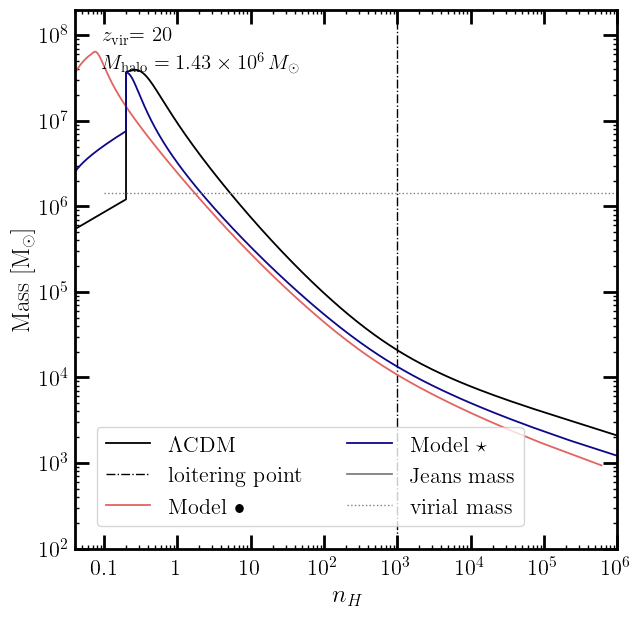

In [24]:
# Jeans and Bonnor-Ebert masses

%autoreload
plt.figure(figsize=(7,7))
ax = plt.gca()
plt.loglog()

for key in ['LCDM', 'fast', 'slow']: #DH_data.keys():
    temp = halo_data[key]['y'][2] # eV
    rho = halo_data[key]['y'][3] * phys.mp * mu # eV / cm^3

    nH = halo_data[key]['y'][3]
    ind_min = np.argmin(nH)

    M_J = Jeans_mass(temp, rho)
    M_BE = BonnorEbert_mass(temp, rho)

    # Get rid of discontinuity
    discont_mask = np.roll(halo_data[key]['t'] != rs_vir_actual[key], -1)
    # discont_mask_fs = np.roll(halo_data[key+' fhalo']['t'] != rs_vir_actual[key+' fhalo'], -1)

    # Plot relevant mass scales
    plt.plot(nH[ind_min:], M_J[ind_min:], linewidth=1.3, color=color_dict[key], label=label_dict[key])
    # plt.plot(halo_data[key]['t'][discont_mask], M_BE[discont_mask], linewidth=1.3, color=color_dict[key], linestyle='--')
    if key == 'LCDM':
        plt.vlines(1e3, 1, 1e10, color=color_dict[key], linewidth=1, linestyle='-.', label='loitering point')

# Dummy lines for legend
plt.plot([0, -1], [0, -1], linewidth=1.3, color='gray', label='Jeans mass')
# plt.plot([0, -1], [0, -1], linewidth=1.3, color='gray', linestyle='--', label='Bonnor-Ebert mass')

# Virial mass for comparison
plt.hlines(M_halo, 1e-1, 1e6, color='gray', linewidth=1, linestyle=':', label='virial mass')

plt.axis([4e-2, 1e6, 1e2, 2e8])

plt.legend(loc='lower left', ncols=2)
plt.xlabel(r'$n_H$ [cm$^-3$]')
plt.ylabel(r'Mass [M$_\odot$]')
plt.text(0.05, 0.94, r"$z_\mathrm{vir}$"+f"= {rs_vir:.0f}", fontsize=15, transform = ax.transAxes)
plt.text(0.05, 0.89, r"$M_\mathrm{halo} = 1.43 \times 10^6 \, M_\odot$", fontsize=15, transform = ax.transAxes)

# plt.savefig(fig_dir+f'LW_halo_evol_zvir{rs_vir:.0f}_M{M_halo:.2E}_{key}.pdf')
plt.show()